# IMPLEMENTACIÓN DEL MODELO LOGÍSTICO MODIFICADO

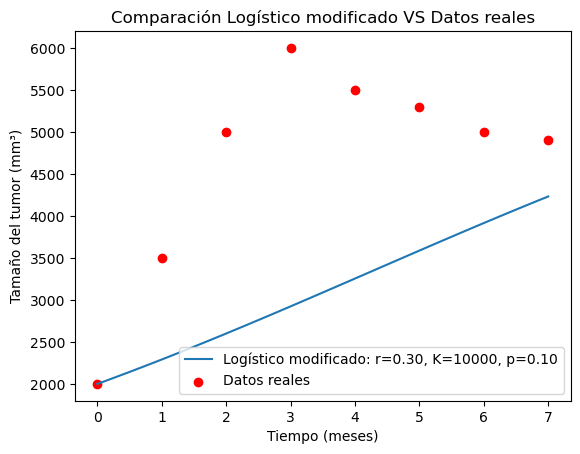

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos Reales (t, Volumen)
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.0, 5.5, 5.3, 5.0, 4.9])
volumen_mm3 = volumen * 1000  # Convertir a mm^3

# Función que representa la solución del modelo Logístico modificado.
def modified_log(t, K, r, p, N0):
    C = N0 / (-N0 * r + K * (r - p))
    N = (K * (r - p) * C * np.exp(t * (r - p))) / (1 + r * C * np.exp(t * (r - p)))
    return N

# Parámetros del modelo Gompertz modificado
r = 0.3
K = 10000
p = 0.1
N0 = volumen_mm3[0]  # Condición inicial

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(0, 7, 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = modified_log(t_eval, K, r, p, N0)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval, label=f'Logístico modificado: r={r:.2f}, K={K}, p={p:.2f}')
plt.scatter(meses, volumen_mm3, color='red', label='Datos reales')
plt.legend(loc='lower right')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Tamaño del tumor (mm³)')
plt.title('Comparación Logístico modificado VS Datos reales')
plt.savefig('Logıstico modificado y datos reales.png')
plt.show()



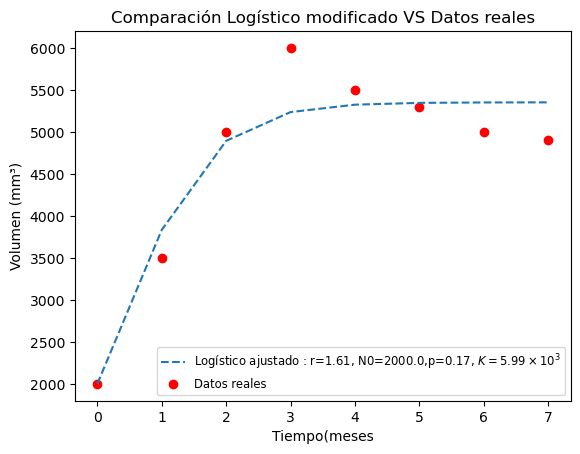

Parámetros ajustados (K, r,p): [5.98920743e+03 1.61369696e+00 1.71603936e-01]


In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
N0 = volumen_mm3[0]
# Función que representa la solución del modelo Logístico modificado
def modified_log(t, K, r, p):
    C = volumen_mm3[0] / (-volumen_mm3[0] * r + K * (r - p))
    N = (K * (r - p) * C * np.exp(t * (r - p))) / (1 + r * C * np.exp(t * (r - p)))
    return N

# Datos Reales (t, N)
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.0, 5.5, 5.3, 5.0, 4.9])
volumen_mm3 = volumen * 1000

# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(modified_log, meses, volumen_mm3, p0=[10000, 0.3,0.1], bounds=([1e-6, 0,0], [np.inf, np.inf,np.inf]))
r=params[1]
K=params[0]
p=params[2]
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(0, 7, 100)

# Generar la curva ajustada
fitted_curve = modified_log(meses, *params)

# Visualizar los resultados
plt.plot(meses, fitted_curve,label=f'Logístico ajustado : r={r:.2f}, N0={N0},p={p:.2f}, $K={K/1e3:.2f} \\times 10^3$', linestyle='--')
plt.scatter(meses, volumen_mm3, color='red', label='Datos reales')
plt.xlabel('Tiempo(meses')
plt.ylabel('Volumen (mm³)')
plt.title('Comparación Logístico modificado VS Datos reales')
plt.legend(loc='lower right',fontsize='small')
plt.savefig('Logístico modificado ajustado y datos reales.png')
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados (K, r,p):", params)

In [8]:
r=params[1]
K=params[0]
p=params[2]
print(r,K,p)


1.6136969618707873 5989.207431334415 0.1716039355335891


4520.213911159036
4520.213911159008
4520.213911158504


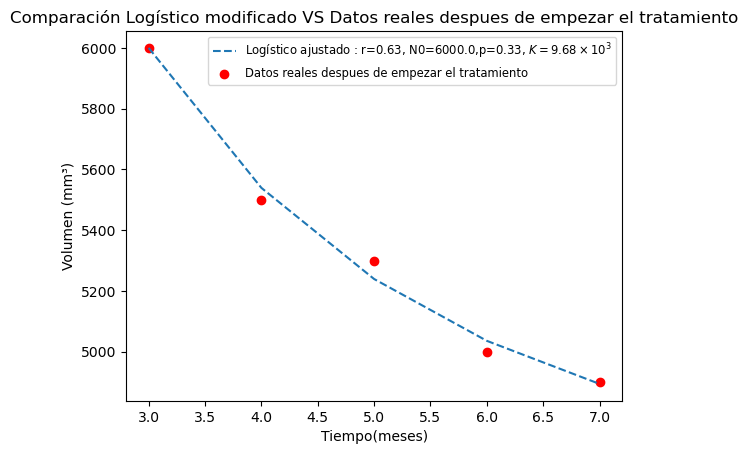

0.6273393121980448 9676.60309916106 0.334291446438204


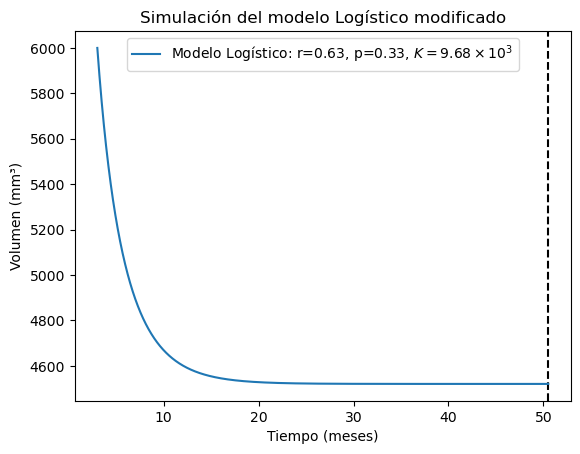

Valor de t donde N(t) se hace constante: 50.51535153515351


In [54]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
volumen = np.array([6.0, 5.5, 5.3, 5.0, 4.9])
volumen_mm3 = volumen * 1000
N0 = volumen_mm3[0]
# Función que representa la solución de la ecuación diferencial del modelo
def modified_log(t, K, r, p):
    t0=3
    denominador = -N0 * r * np.exp(t0 * (r - p)) + K * (r - p) * np.exp(t0 * (r - p)) 
    C = volumen_mm3[0] / denominador
    N = (K * (r - p) * C * np.exp(t * (r - p))) / (1 + r * C * np.exp(t * (r - p)))
    return N

# Datos Reales (t, N)
meses = np.array([3, 4, 5, 6, 7])


# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(modified_log, meses, volumen_mm3, p0=[10000, 0.3,0.1], bounds=([1e-6, 0,0], [np.inf, np.inf,np.inf]))
r=params[1]
K=params[0]
p=params[2]
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(4, 7, 100)

# Generar la curva ajustada
fitted_curve = modified_log(meses, *params)
print(modified_log(99.8156815681568,*params))
print(modified_log(100,*params))
print(K*(r-p)/r)
# Visualizar los resultados
plt.plot(meses, fitted_curve,label=f'Logístico ajustado : r={r:.2f}, N0={N0},p={p:.2f}, $K={K/1e3:.2f} \\times 10^3$', linestyle='--')
plt.scatter(meses, volumen_mm3, color='red', label='Datos reales despues de empezar el tratamiento')
plt.xlabel('Tiempo(meses)')
plt.ylabel('Volumen (mm³)')
plt.title('Comparación Logístico modificado VS Datos reales despues de empezar el tratamiento')
plt.legend(loc='upper right',fontsize='small')
plt.savefig(' Log ́ıstico modificado ajustado y datos reales despu ́es del tratamiento.png')
plt.show()
print(r,K,p)
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(3, 100,10000)

# Inicializar listas para almacenar los resultados
N_values = []
t_values = []

# Iterar sobre los puntos de evaluación
for t in t_eval:
    # Calcular el valor de N(t) usando la función ajustada
    N_t = modified_log(t, K, r, p)
    # Agregar el valor de N(t) y t a las listas
    N_values.append(N_t)
    t_values.append(t)
    # Detener la iteración si los últimos dos valores de N(t) son iguales
    if len(N_values) >= 2 and abs(N_values[-1] - K*(r-p)/r) < 0.001:
        # Graficar una línea negra punteada en el punto donde se alcanza el valor constante de N(t)
        plt.axvline(x=t, color='black', linestyle='--')
        break
# Visualizar los resultados
plt.plot(t_values, N_values, label=f'Modelo Logístico: r={r:.2f}, p={p:.2f}, $K={K/1e3:.2f} \\times 10^3$')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Volumen (mm³)')
plt.title('Simulación del modelo Logístico modificado')
plt.legend()
plt.savefig('Simulación del modelo Logístico ajustado después del tratamiento.png')
plt.show()

print("Valor de t donde N(t) se hace constante:", t)
